In [1]:
# import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
import warnings
warnings.filterwarnings('ignore')

### Data import

In [2]:
path = 'C:/Users/Anupama Mehra/Desktop/Data Science/ML CS/'
credit_cons = pd.read_excel( path + 'CreditConsumptionData.xlsx' )
cust_behav = pd.read_excel( path + 'CustomerBehaviorData.xlsx')
cust_demog = pd.read_excel( path + 'CustomerDemographics.xlsx')

### UDFs

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.nunique(), x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['C','N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(str(x.mode()))
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### Data merging and data Inspection

In [7]:
data1 = pd.merge(cust_demog,cust_behav,on = 'ID')

In [8]:
data = pd.merge(data1,credit_cons,on = 'ID')

In [9]:
# separate the object and numeric variable names
data_num = data.select_dtypes( ['float64', 'int64', 'float32', 'int32'] )
data_object = data.select_dtypes( ['object'] )

In [10]:
# get the data audit report for all the variables
num_summary = data_num.apply(continuous_var_summary).T
num_summary

,C,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ID,20000.0,20000.0,0.0,1.999900e+08,9999.500000,9999.5000,5.773647e+03,3.333500e+07,0.00,199.9900,999.95000,1999.900,4999.750,9999.5000,14999.2500,17999.1000,1.899905e+04,1.979901e+04,19999.00
age,43.0,20000.0,0.0,9.534460e+05,47.672300,40.0000,3.035977e+01,9.217157e+02,25.00,27.0000,28.00000,29.000,33.000,40.0000,53.0000,64.0000,6.600000e+01,2.220000e+02,223.00
Emp_Tenure_Years,270.0,20000.0,0.0,3.043450e+05,15.217250,9.9000,2.048145e+01,4.194900e+02,0.50,0.9000,1.70000,2.700,5.100,9.9000,18.0000,31.5000,4.000000e+01,1.212000e+02,203.00
Tenure_with_Bank,10.0,20000.0,0.0,1.099210e+05,5.496050,6.0000,2.870452e+00,8.239496e+00,1.00,1.0000,1.00000,2.000,3.000,6.0000,8.0000,10.0000,1.000000e+01,1.000000e+01,10.00
region_code,210.0,19999.0,1.0,1.197859e+07,598.959348,623.0000,2.201052e+02,4.844631e+04,123.00,233.0000,249.00000,269.000,424.000,623.0000,799.0000,883.0000,9.370000e+02,9.680000e+02,974.00
NetBanking_Flag,2.0,20000.0,0.0,1.436000e+04,0.718000,1.0000,4.499846e-01,2.024861e-01,0.00,0.0000,0.00000,0.000,0.000,1.0000,1.0000,1.0000,1.000000e+00,1.000000e+00,1.00
Avg_days_between_transaction,19.0,19997.0,3.0,2.208620e+05,11.044757,11.0000,5.480552e+00,3.003645e+01,2.00,2.0000,2.00000,3.000,6.000,11.0000,16.0000,19.0000,2.000000e+01,2.000000e+01,20.00
cc_cons_apr,8459.0,20000.0,0.0,3.571398e+08,17856.990922,10214.6425,2.515888e+04,6.329692e+08,253.00,641.9886,1219.00000,1908.000,4377.000,10214.6425,21189.0000,40640.9000,5.910673e+04,1.252595e+05,441031.33
dc_cons_apr,3861.0,20000.0,0.0,1.626091e+08,8130.453414,3964.7500,1.457219e+04,2.123487e+08,19.35,153.1286,378.00000,643.850,1624.650,3964.7500,9339.0200,18443.6910,2.783500e+04,6.447075e+04,229255.00
cc_cons_may,8504.0,19999.0,1.0,3.237511e+08,16188.364717,8635.2300,2.651068e+04,7.028162e+08,157.00,509.4900,1035.77400,1666.328,3635.910,8635.2300,18655.3050,36139.5880,5.396238e+04,1.257354e+05,1117246.31


In [11]:
# Drop ID column as it is of no use for now
# Drop cc_cons which is our target column and contains alot of missing values
data_num.drop(['ID', 'cc_cons'],axis='columns',inplace= True)

In [12]:
# Create Data audit Report for categorical variables
obj_summary = data_object.apply(categorical_var_summary)
obj_summary

,account_type,gender,Income,loan_enq
N,19999,19999,19999,19998
NMISS,1,1,1,2
MODE,current,M,MEDIUM,Y
FREQ,16925,17287,12774,19998
PERCENT,84.63,86.44,63.87,100


### Data cleaning

In [13]:
# Handling Outliers
data_num = data_num.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), 
                                                               upper = x.quantile(0.99)))

In [14]:
# Handling missings
data_num = data_num.apply(lambda x: missing_imputation(x))
data_object = data_object.apply(lambda x: missing_imputation(x))

In [15]:
# Dummy Creation 
data_object = create_dummies(data_object, ['account_type','gender'])
data_object['Income']=  data_object['Income'].map({'HIGH' : 3, 'MEDIUM' : 2, 'LOW' : 1 })
data_object.head()

,Income,loan_enq,account_type_current,account_type_saving,gender_F,gender_M
0,2.0,Y,1,0,0,1
1,2.0,Y,1,0,0,1
2,2.0,Y,1,0,1,0
3,2.0,Y,1,0,0,1
4,3.0,Y,1,0,0,1


In [16]:
# one value was missing in Income column
data_object.Income.fillna(2,inplace=True)

In [17]:
final = pd.concat([data_num,data_object,credit_cons],axis=1)

In [18]:
# removing some columns because they are acting as constant terms 
# all these have only one unique value in them, that value is "1" and for loan_enq that is 'Y'
final = final.drop(['personal_loan_active', 'vehicle_loan_active','personal_loan_closed','vehicle_loan_closed', 'loan_enq'],axis='columns')

### Seperate out the data for existing and the new customers 

In [19]:
data_existing = final.loc[final.cc_cons.isnull() == 0]
data_pred = final.loc[final.cc_cons.isnull() == 1]

In [20]:
data_existing.cc_cons = data_existing.cc_cons.clip(lower = data_existing.cc_cons.quantile(0.01), upper = data_existing.cc_cons.quantile(0.99))

2.118250228550756

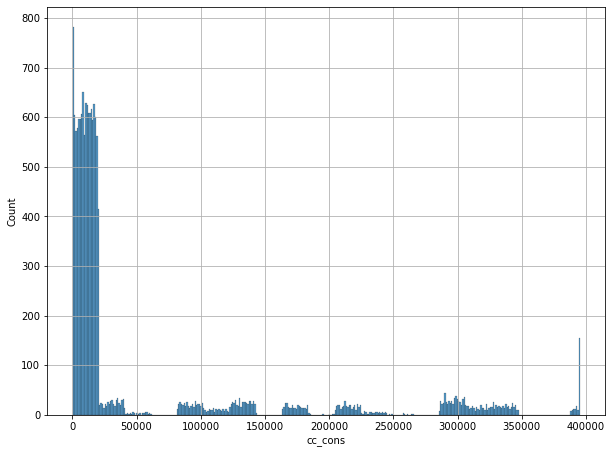

In [21]:
sns.histplot((data_existing.cc_cons))
(data_existing.cc_cons).skew()

0.27319079406367175

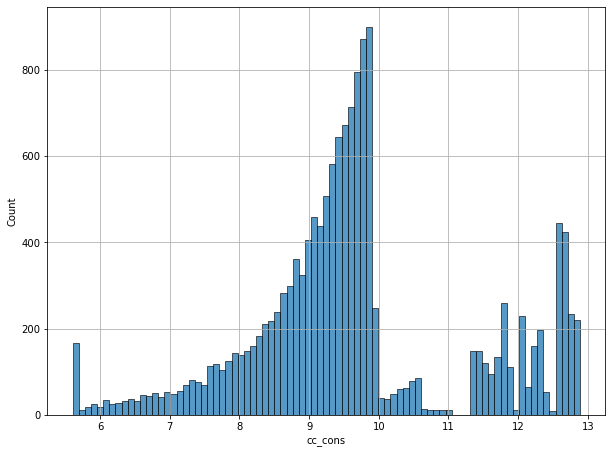

In [22]:
#as data is positively skewed lets try with log transformation 
sns.histplot(np.log(data_existing.cc_cons))
np.log(data_existing.cc_cons).skew()

In [23]:
data_existing['ln_cc_cons']=np.log(data_existing['cc_cons'])

In [24]:
data_existing.drop(columns=['cc_cons'],inplace=True)

### VIF - For Feature reduction 

In [25]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [26]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
feature_columns = data_existing.columns.difference(['ln_cc_cons'])

In [27]:
# seperate the X and y columns
features = data_existing[feature_columns]
target = data_existing['ln_cc_cons']

In [28]:
model_param = 'ln_cc_cons ~ ' + ' + '.join(feature_columns)
model_param

'ln_cc_cons ~ Avg_days_between_transaction + Emp_Tenure_Years + ID + Income + NetBanking_Flag + Tenure_with_Bank + account_type_current + account_type_saving + age + card_lim + cc_cons_apr + cc_cons_jun + cc_cons_may + cc_count_apr + cc_count_jun + cc_count_may + credit_amount_apr + credit_amount_jun + credit_amount_may + credit_count_apr + credit_count_jun + credit_count_may + dc_cons_apr + dc_cons_jun + dc_cons_may + dc_count_apr + dc_count_jun + dc_count_may + debit_amount_apr + debit_amount_jun + debit_amount_may + debit_count_apr + debit_count_jun + debit_count_may + emi_active + gender_F + gender_M + investment_1 + investment_2 + investment_3 + investment_4 + max_credit_amount_apr + max_credit_amount_jun + max_credit_amount_may + region_code'

In [29]:
# separate the Y and X variables
y, X = dmatrices( model_param, data_existing, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(2)

,Features,VIF Factor
0,Intercept,30136.66
1,Avg_days_between_transaction,1.00
2,Emp_Tenure_Years,2.98
3,ID,1.00
4,Income,1.00
5,NetBanking_Flag,1.00
6,Tenure_with_Bank,1.00
7,account_type_current,1928.96
8,account_type_saving,1928.98
9,age,2.99


In [30]:
# output of the VIF
# any coefficient having VIF > 5 is of no use
feature_columns_vif = list( set(vif.loc[:, 'Features']).difference(['Intercept', 'account_type_current', 'account_type_saving', 'gender_F',' gender_M']))

## Start Building Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [32]:
# method 1: divide the data into training and testing and separate out Y and X variables
X_train,X_test,y_train,y_test = train_test_split(data_existing[feature_columns_vif], 
                        data_existing['ln_cc_cons'], test_size = 0.3, random_state = 7)

### Model 1 - Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
# Fitting Linear Regression Model with scikit learn
lin_model=LinearRegression()
lin_model.fit(X_train,y_train);

#### Model Evaluation Metric :

In [35]:
# Evaluating model accuracy based on Root mean square percentage error 'RMSPE'
print('train RMSPE:',(np.sqrt(np.mean(np.square((y_train - lin_model.predict(X_train)) / y_train)))) * 100 )
print('test RMSPE:',(np.sqrt(np.mean(np.square((y_test - lin_model.predict(X_test)) / y_test)))) * 100 )

train RMSPE: 17.629159698454234
test RMSPE: 18.770919765645957


### Model 2 - Decision Trees

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
# hyperparameter tuning of decision tree with randomized search cv
param_grid = { 'max_depth': range(5,20),
               'min_samples_split':range(40,200,20)}
tree = RandomizedSearchCV( DecisionTreeRegressor( random_state = 55 ), param_grid, cv = 10, 
                        scoring = 'neg_mean_squared_error', n_jobs = -1 )
tree.fit(X_train,y_train);

In [38]:
# get best parameters
print(tree.best_params_)

{'min_samples_split': 40, 'max_depth': 6}


#### Model Evaluation Metric :

In [39]:
# take the best model and evaluating model accuracy based on Root mean square percentage error 'RMSPE'
print('train RMSPE:',(np.sqrt(np.mean(np.square((y_train - tree.best_estimator_.predict(X_train)) / y_train)))) * 100 )
print('test RMSPE:',(np.sqrt(np.mean(np.square((y_test - tree.best_estimator_.predict(X_test)) / y_test)))) * 100 )

train RMSPE: 17.26010927386708
test RMSPE: 19.135423604531017


In [40]:
# best of neg_mean_squared_error
tree.best_score_

-2.5553553971069607

### Model 3 - Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
# hyperparameter tuning of random forest with randomized search cv
param_grid = { 'n_estimators':range(10,100,10),
               'max_depth': range(5,20),'min_samples_split':range(40,200,20)}
rf_model =  RandomizedSearchCV( RandomForestRegressor( random_state = 55 ), param_grid, cv = 5, 
                        scoring = 'neg_mean_squared_error', n_jobs = -1 )
rf_model.fit(X_train,y_train);

In [43]:
# get best parameters
print(rf_model.best_params_)

{'n_estimators': 90, 'min_samples_split': 100, 'max_depth': 5}


#### Model Evaluation Metric :

In [44]:
# take the best model and evaluating model accuracy based on Root mean square percentage error RMSPE
print('train RMSPE:',(np.sqrt(np.mean(np.square((y_train - rf_model.best_estimator_.predict(X_train)) / y_train)))) * 100 )
print('test RMSPE:',(np.sqrt(np.mean(np.square((y_test - rf_model.best_estimator_.predict(X_test)) / y_test)))) * 100 )

train RMSPE: 17.359960663360344
test RMSPE: 18.760176060626225


In [45]:
# best of neg_mean_squared_error
rf_model.best_score_

-2.446761745994934

### Prediction for customer where target variable having missing values

In [46]:
data_pred.reset_index(drop = True, inplace = True)

In [47]:
# performing prediction by using Random Forest method
X_new = data_pred[X_train.columns]
y_pred = rf_model.predict(X_new.values)

In [48]:
Predicted_Card_consumption=pd.concat([data_pred['ID'], pd.Series(y_pred)], axis=1)
Predicted_Card_consumption.rename(columns={0:'cc_cons'},inplace=True)

In [49]:
Predicted_Card_consumption['cc_cons']=np.exp(Predicted_Card_consumption['cc_cons'])
Predicted_Card_consumption.head()

,ID,cc_cons
0,17591,15108.691910
1,13541,15131.373562
2,13431,14438.692790
3,8687,15659.459167
4,14727,16670.653888


In [50]:
# storing all predicted values in one csv file for convenient view 
Predicted_Card_consumption.to_csv('final_predicted_cc.csv',index=None,header=True)